# Feature 

In [137]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import snownlp
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from textblob import TextBlob
from snownlp import SnowNLP


<font size=6>Read file</font>

In [138]:
test = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Project/final-project/dataset/test.pkl')
feat_data = 'feat_test_v1'
save = True
test


,web_url,print_section,print_page,news_desk,section_name,type_of_material,word_count,subsection_name,pub_year,pub_month,...,abstract_len,abstract_dup,headline,headline_len,headline_dup,headline_kicker,len_lead,keywords,authors,n_comment
0,https://www.nytimes.com/2020/12/31/us/george-f...,A,17,National,U.S.,News,861,NaN,2021,1,...,29,0,Minneapolis Police Release Body Camera Video o...,13,0,None,37,"[Idd, Dolal B, Police Brutality, Misconduct an...",[Nicholas Bogel-Burroughs],0
1,https://www.nytimes.com/2020/12/31/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,670,NaN,2021,1,...,18,0,Party Hearty,2,0,"Wordplay, The CROSSWORD COLUMN",74,[Crossword Puzzles],[Caitlin Lovinger],124
2,https://www.nytimes.com/2020/12/31/us/rose-par...,NaN,NaN,National,U.S.,News,488,NaN,2021,1,...,21,0,No Rose Parade: Southern California laments th...,11,0,None,61,[],[Tim Arango],0
3,https://www.nytimes.com/2021/01/01/nyregion/ny...,A,5,Metro,New York,News,1541,NaN,2021,1,...,29,0,Virus Numbers Are Surging. Why Is New York’s V...,11,0,None,58,"[Coronavirus (2019-nCoV), Vaccination and Immu...",[Joseph Goldstein],250
4,https://www.nytimes.com/interactive/2021/01/01...,NaN,NaN,Well,Well,Interactive Feature,0,Live,2021,1,...,8,30,"Weekly Health Quiz: A New Coronavirus Variant,...",13,0,None,8,"[Exercise, Coronavirus (2019-nCoV), Diet and N...",[Toby Bilanow],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34352,https://www.nytimes.com/2022/12/31/opinion/let...,SR,9,Letters,Opinion,Letter,1044,Letters,2022,12,...,14,0,The Choice of a Medically Assisted Death,7,0,letters,3,"[Euthanasia and Assisted Suicide, Canada]",[],0
34353,https://www.nytimes.com/2022/12/31/opinion/bra...,NaN,NaN,OpEd,Opinion,Op-Ed,1089,NaN,2022,12,...,13,0,"For Lula and the World, the Tough Job of Savin...",13,0,Guest Essay,35,"[Agriculture and Farming, Beef, Mines and Mini...",[Heriberto Araujo],0
34354,https://www.nytimes.com/2022/12/31/business/me...,NaN,NaN,Business,Business Day,News,1801,Media,2022,12,...,16,0,How Barbara Walters Went From ‘Today Girl’ to ...,11,0,an appraisal,31,"[News and News Media, Television, Celebrities,...",[Tiffany Hsu],0
34355,https://www.nytimes.com/2022/12/31/insider/71-...,A,4,Insider,Times Insider,News,2426,NaN,2022,12,...,31,0,71 of Our Favorite Facts of 2022,7,0,None,34,[Two Thousand Twenty Two],"[Times Staff, Joohee Yoon]",0


<font size=6>Set bound of popularity</font>

In [139]:
median = test['n_comment'].median()
print(median)
test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > median else 0)
#test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > 135 else 0)
pop_count = 0
for i in test['is_popular']:
    if i:
        pop_count += 1
print('popular:    ' , pop_count / len(test))
print('not popular:' , 1 - pop_count / len(test))
#test = test.drop(columns = ['n_comment'])

0.0
popular:     0.31735899390243905
not popular: 0.682641006097561


In [140]:
print(test.columns)

Index(['web_url', 'print_section', 'print_page', 'news_desk', 'section_name',
       'type_of_material', 'word_count', 'subsection_name', 'pub_year',
       'pub_month', 'pub_day', 'pub_weekday', 'pub_time', 'abstract',
       'abstract_len', 'abstract_dup', 'headline', 'headline_len',
       'headline_dup', 'headline_kicker', 'len_lead', 'keywords', 'authors',
       'n_comment', 'is_popular'],
      dtype='object')


<font size=6>Hour</font>


pub_time
0     0.301462
1     0.269531
2     0.388401
3     0.288503
4     0.212291
5     0.263672
6     0.427632
7     0.645418
8     0.496564
9     0.509224
10    0.495199
11    0.205797
12    0.180215
13    0.310266
14    0.320442
15    0.292767
16    0.268544
17    0.216564
18    0.206266
19    0.240539
20    0.180917
21    0.154947
22    0.190635
23    0.285309
Name: is_popular, dtype: float64
-0.011813981564578222


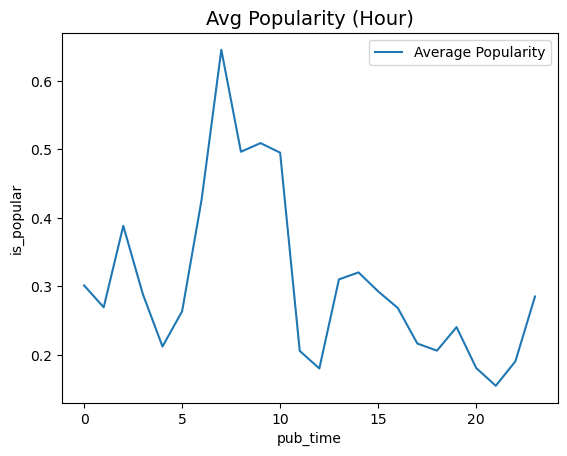

In [141]:
print(test.groupby('pub_time').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_time').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Hour)', fontsize=14)
#plt.axvline(x = 3, linestyle= '--')

test['is_noon'] = test['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
print(test.corr()['is_popular']['is_noon'])

<font size=6>Weekday</font>

In [142]:
print(test.groupby('pub_weekday').mean()['is_popular'])

pub_weekday
0    0.362683
1    0.363138
2    0.350616
3    0.313950
4    0.275094
5    0.224673
6    0.267757
Name: is_popular, dtype: float64


<font size=6>Day of week</font>

0.06510405110069248


Text(0.5, 1.0, 'Avg Popularity (Day of Week)')

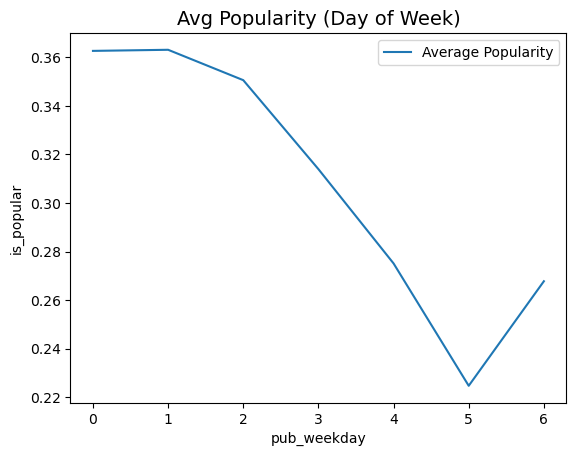

In [143]:
test['is_weekday'] = test['pub_weekday'].apply(lambda x : 1 if x < 5 else 0)
print(test.corr()['is_popular']['is_weekday'])
sns.lineplot(data = test.groupby('pub_weekday').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Day of Week)', fontsize=14)


<font size=6>Day of month</font>

pub_day
1     0.308756
2     0.298851
3     0.323445
4     0.296261
5     0.292124
6     0.321782
7     0.345356
8     0.303589
9     0.293852
10    0.331678
11    0.314394
12    0.326797
13    0.269455
14    0.334234
15    0.308958
16    0.310541
17    0.336873
18    0.322736
19    0.310244
20    0.325581
21    0.328082
22    0.320965
23    0.316804
24    0.303093
25    0.325605
26    0.329876
27    0.336591
28    0.329423
29    0.317365
30    0.347826
31    0.312354
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (day)')

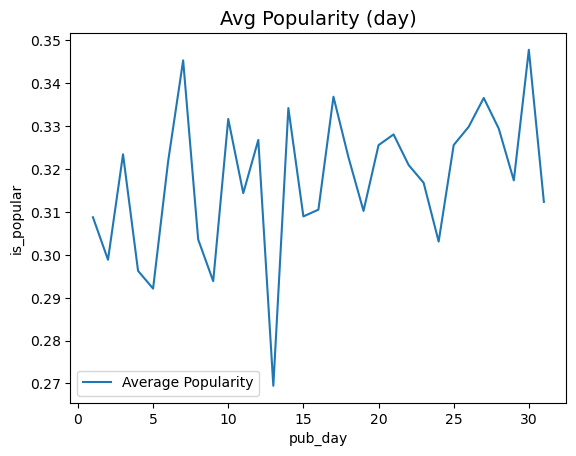

In [144]:
print(test.groupby('pub_day').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_day').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (day)', fontsize=14)

<font size=6>Month</font>

pub_month
1     0.302352
2     0.302075
3     0.325851
4     0.313988
5     0.307371
6     0.312195
7     0.296509
8     0.322724
9     0.330272
10    0.335232
11    0.319386
12    0.341088
Name: is_popular, dtype: float64
0.02311723829868151


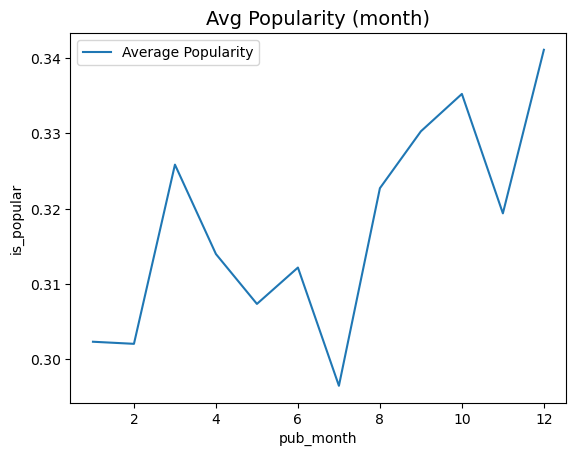

In [145]:
print(test.groupby('pub_month').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_month').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (month)', fontsize=14)
test['is_lowmonth'] = test['pub_time'].apply(lambda x : 0 if (x >= 3 and x <= 6) else 1)
print(test.corr()['is_popular']['is_lowmonth'])
#print(test.corr()['is_popular']['is_noon'])

<font size=6>News desk</font>

In [146]:
table = pd.read_pickle('./table/newsdesk.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_news_desk'] = test['news_desk'].apply(lambda x : table[x] if x in table else mean)
test['feature_news_desk'] = test['group_by_news_desk'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_news_desk'])
print(test.corr()['is_popular']['feature_news_desk'])

0.24793719257921445
0.4483853585337789
0.44328033268443606


<font size=6>Section</font>

In [147]:
table_sec = pd.read_pickle('./table/section.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_section_name'] = test['section_name'].apply(lambda x : table_sec[x] if x in table_sec else mean)
test['feature_section_name'] = test['group_by_section_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_section_name'])
print(test.corr()['is_popular']['feature_section_name'])

0.24793719257921445
0.43114955344546074
0.4288799265703152


<font size=6>Subsection</font>

In [148]:
table_sub = pd.read_pickle('./table/subsection.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_subsection_name'] = test['subsection_name'].apply(lambda x : table_sub[x] if x in table_sub else mean)
test['feature_subsection_name'] = test['group_by_subsection_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_subsection_name'])
print(test.corr()['is_popular']['feature_subsection_name'])

0.24793719257921445
0.21441980185215695
0.1834548240492416


<font size=6>Material</font>

In [149]:
table_mat = pd.read_pickle('./table/material.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_type_of_material'] = test['type_of_material'].apply(lambda x : table_mat[x] if x in table_mat else mean)
test['feature_type_of_material'] = test['group_by_type_of_material'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_type_of_material'])
print(test.corr()['is_popular']['feature_type_of_material'])

0.24793719257921445
0.18316508751063473
0.17525750913226734


<font size=6>Keyword</font>

<font size=5>Politics<font size=4>( party, congress, president )</font></font>


In [150]:
test['is_party'] = test['keywords'].apply(lambda x: 1 if ('Democratic Party' in x or 'Republican Party' in x ) else 0)
test['is_congress'] = test['keywords'].apply(lambda x: 1 if ('House of Representatives' in x or 'Senate' in x) else 0)
test['is_president'] = test['keywords'].apply(lambda x: 1 if ('Trump, Donald J' in x or 'Biden, Joseph R Jr' in x)else 0)
print(test.corr()['is_popular']['is_party'])
print(test.corr()['is_popular']['is_congress'])
print(test.corr()['is_popular']['is_president'])

0.06266570896709188
0.02801517048639683
0.050659166908733504


<font size=5>Event <font size=4>( Ukrainian_Russian_war, covid, Storming of the US Capitol )</font></font>


In [151]:
test['is_ukrainian_russian_war'] = test['keywords'].apply(lambda x: 1 if ('War and Armed Conflicts' in x or 'Ukraine' in x ) else 0)
test['is_covid'] = test['keywords'].apply(lambda x: 1 if 'Coronavirus (2019-nCoV)' in x else 0)
test['is_storm'] = test['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
print('ukrainian_russian_war     ', test.corr()['is_popular']['is_ukrainian_russian_war'])
print('Coronavirus               ', test.corr()['is_popular']['is_covid'])
print('Storming of the US Capitol', test.corr()['is_popular']['is_storm'])

ukrainian_russian_war      -0.0131753276757405
Coronavirus                -0.004949716218003601
Storming of the US Capitol 0.01902316344132087


<font size=5>News game<font size=4>(spelling bee, crossword puzzle)</font></font>

In [152]:
test['is_spell'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)' in x else 0)
test['is_crossword'] = test['keywords'].apply(lambda x: 1 if 'Crossword Puzzles' in x else 0)
test['is_game'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
print(test.corr()['is_popular']['is_spell'])
print(test.corr()['is_popular']['is_crossword'])
print(test.corr()['is_popular']['is_game'])

0.10460504760701476
0.13312475998332032
0.1702843943034305


<font size=6>Headline length</font>

-0.07514813685453055


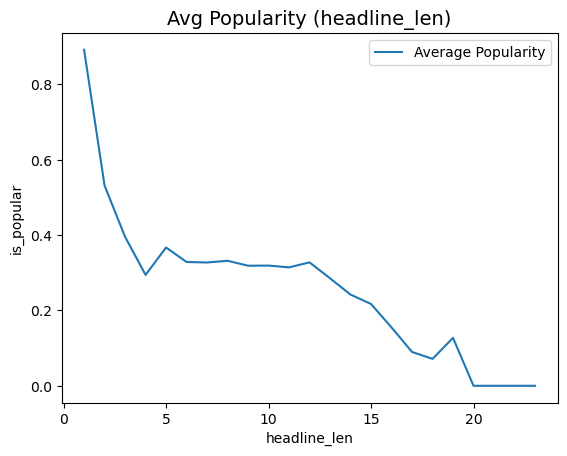

In [153]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('headline_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (headline_len)', fontsize=14)
print(test.corr()['is_popular']['headline_len'])

<font size=6>Abstract length</font>

-0.04003733164605299


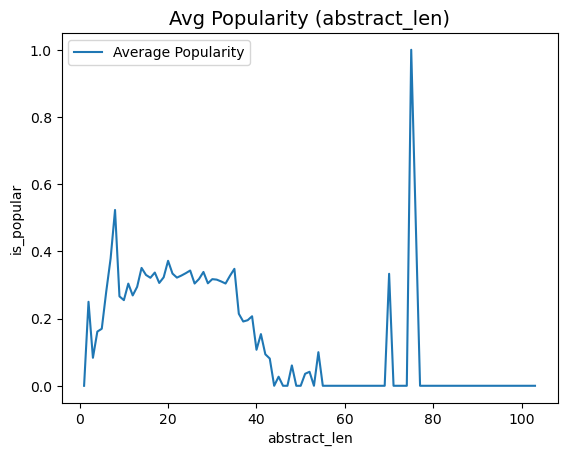

In [154]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_len)', fontsize=14)
print(test.corr()['is_popular']['abstract_len'])

<font size=6>Word count</font>

0.20005571120980806


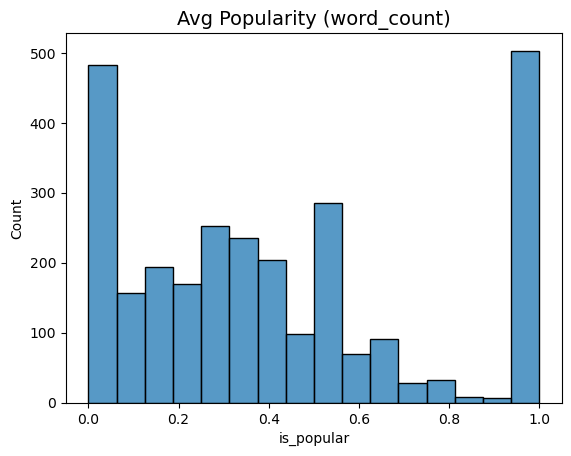

In [155]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.histplot(data = test.groupby('word_count').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (word_count)', fontsize=14)
print(test.corr()['is_popular']['word_count'])

0.03642956657895108


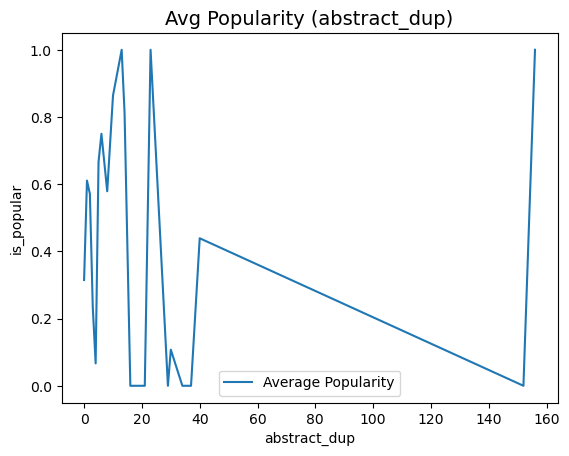

In [156]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_dup').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_dup)', fontsize=14)
print(test.corr()['is_popular']['abstract_dup'])

<font size=6>Lead paragraph length</font>

0.044431180543564416


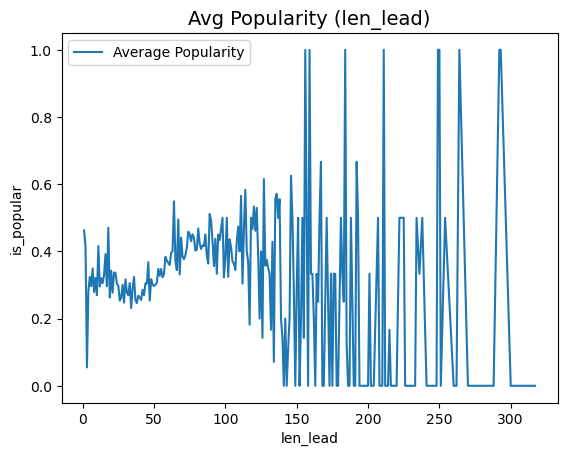

In [157]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('len_lead').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (len_lead)', fontsize=14)
print(test.corr()['is_popular']['len_lead'])

<font size = 6>Sentiment analyze</font>

<font size = 5>punctuation removal</font>

In [158]:
punct_list = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
def remove_punctuation(headline):
    for punc in punct_list:
        if punc in headline:
            headline = headline.replace(punc, ' ')
    return headline
test['clean_headline'] = test['headline'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [159]:

text = "i am happy today."
blob = TextBlob(text)
# get the sentiment of the text
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [160]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_tb_polar'] = test['clean_headline'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_tb_polar_abs'] = test['sentiment_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_tb_subj'] = test['clean_headline'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_tb_pos'] = test['sentiment_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_tb_polar'])
print(test.corr()['is_popular']['sentiment_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_tb_subj'])
print(test.corr()['is_popular']['sentiment_tb_pos'])

-8.808330755511678e-05
0.02817962835368515
0.01925344063584054
-0.0021620996468001085


<font size = 5>vader</font>

In [161]:
headline = 'today is a sunny day!'
analyzer = SentimentIntensityAnalyzer ()
sentiment_dict = analyzer.polarity_scores(headline)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4753}


In [162]:
test['sentiment_vader_neg'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_vader_neu'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_vader_pos'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_vader_compound'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_vader_neg'])
print(test.corr()['is_popular']['sentiment_vader_neu'])
print(test.corr()['is_popular']['sentiment_vader_pos'])
print(test.corr()['is_popular']['sentiment_vader_compound'])
print(test.corr()['is_popular']['sentiment_vader_compound_abs'])

-0.005724050483338141
-0.002321358840300934
0.009338067963210281
0.013293583136498748
-0.018681776170276193


<font size = 5>snownlp</font>

In [163]:
headline = 'i am happy'
s = SnowNLP(headline)
print(s.sentiments)

0.1837233963534416


In [164]:
test['sentiment_snow'] = test['clean_headline'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_snow_abs'] = test['sentiment_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_snow_pos'] = test['sentiment_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_snow'])
print(test.corr()['is_popular']['sentiment_snow_abs'])
print(test.corr()['is_popular']['sentiment_snow_pos'])

0.01037371290562148
-0.01388831000691313
-0.011721971313911886


<font size = 6>abstract</font>

In [165]:
#test = test.drop(13348)
test['clean_abstract'] = test['abstract'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [166]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_abstract_tb_polar'] = test['clean_abstract'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_abstract_tb_polar_abs'] = test['sentiment_abstract_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_abstract_tb_subj'] = test['clean_abstract'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_abstract_tb_pos'] = test['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_tb_polar'])
print(test.corr()['is_popular']['sentiment_abstract_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_abstract_tb_subj'])
print(test.corr()['is_popular']['sentiment_abstract_tb_pos'])

0.023898295290599357
0.0473202957504769
0.04495995833260413
0.03655516902826869


<font size = 5>vader</font>

In [167]:
test['sentiment_abstract_vader_neg'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_abstract_vader_neu'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_abstract_vader_pos'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_abstract_vader_compound'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_abstract_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_abstract_vader_neg'])
print(test.corr()['is_popular']['sentiment_abstract_vader_neu'])
print(test.corr()['is_popular']['sentiment_abstract_vader_pos'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound_abs'])

-0.0005366801518028142
-0.06135675504664274
0.0801075452911569
0.04707852576776925
-0.018681776170276193


<font size = 5>snownlp</font>

In [168]:
test['sentiment_abstract_snow'] = test['clean_abstract'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_abstract_snow_abs'] = test['sentiment_abstract_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_abstract_snow_pos'] = test['sentiment_abstract_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_snow'])
print(test.corr()['is_popular']['sentiment_abstract_snow_abs'])
print(test.corr()['is_popular']['sentiment_abstract_snow_pos'])

0.04654039570437582
-0.029460976995928954
0.03901570264055938


In [169]:
fea_list = test.corr()['is_popular']
fea_list = fea_list.sort_values(key = lambda x : abs(x), ascending=False)
print(fea_list)

is_popular                               1.000000
n_comment                                0.458070
group_by_news_desk                       0.448385
feature_news_desk                        0.443280
group_by_section_name                    0.431150
feature_section_name                     0.428880
group_by_subsection_name                 0.214420
word_count                               0.200056
feature_subsection_name                  0.183455
group_by_type_of_material                0.183165
feature_type_of_material                 0.175258
is_game                                  0.170284
pub_time                                -0.155101
is_crossword                             0.133125
is_spell                                 0.104605
pub_weekday                             -0.088438
sentiment_abstract_vader_pos             0.080108
headline_len                            -0.075148
is_weekday                               0.065104
is_party                                 0.062666


<AxesSubplot:>

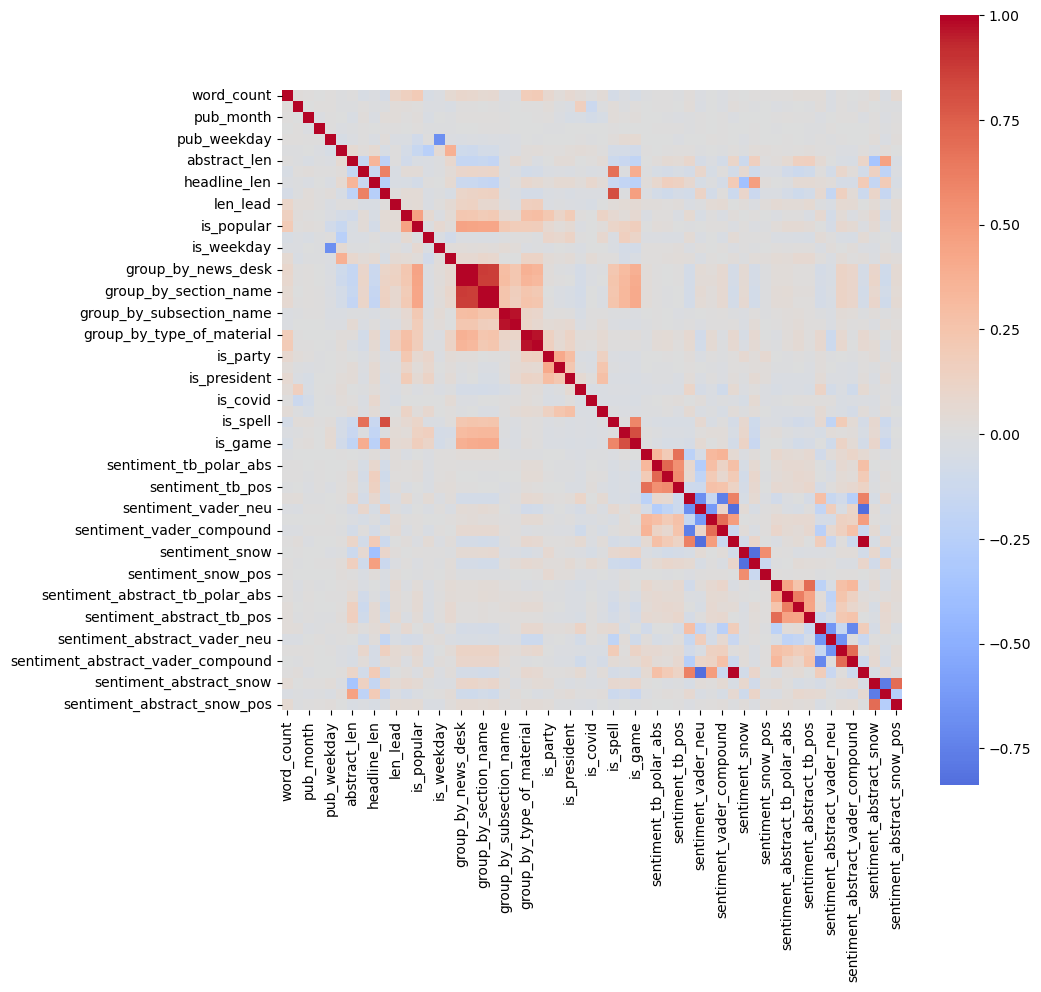

In [170]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

In [171]:

file = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Project/final-project/feature/feat_v1.pkl')    
for col in test.columns:
    if col not in file.columns:
        test = test.drop(columns=col)  
            

In [172]:
test.columns

Index(['word_count', 'pub_month', 'pub_time', 'abstract_len', 'headline_len',
       'len_lead', 'is_popular', 'is_noon', 'is_weekday',
       'feature_section_name', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_storm',
       'is_spell', 'is_crossword', 'sentiment_tb_polar_abs',
       'sentiment_tb_subj', 'sentiment_vader_neg', 'sentiment_vader_pos',
       'sentiment_vader_compound_abs', 'sentiment_snow_abs',
       'sentiment_snow_pos', 'sentiment_abstract_tb_polar',
       'sentiment_abstract_tb_polar_abs', 'sentiment_abstract_tb_subj',
       'sentiment_abstract_vader_pos', 'sentiment_abstract_vader_compound_abs',
       'sentiment_abstract_snow_abs', 'sentiment_abstract_snow_pos'],
      dtype='object')

<AxesSubplot:>

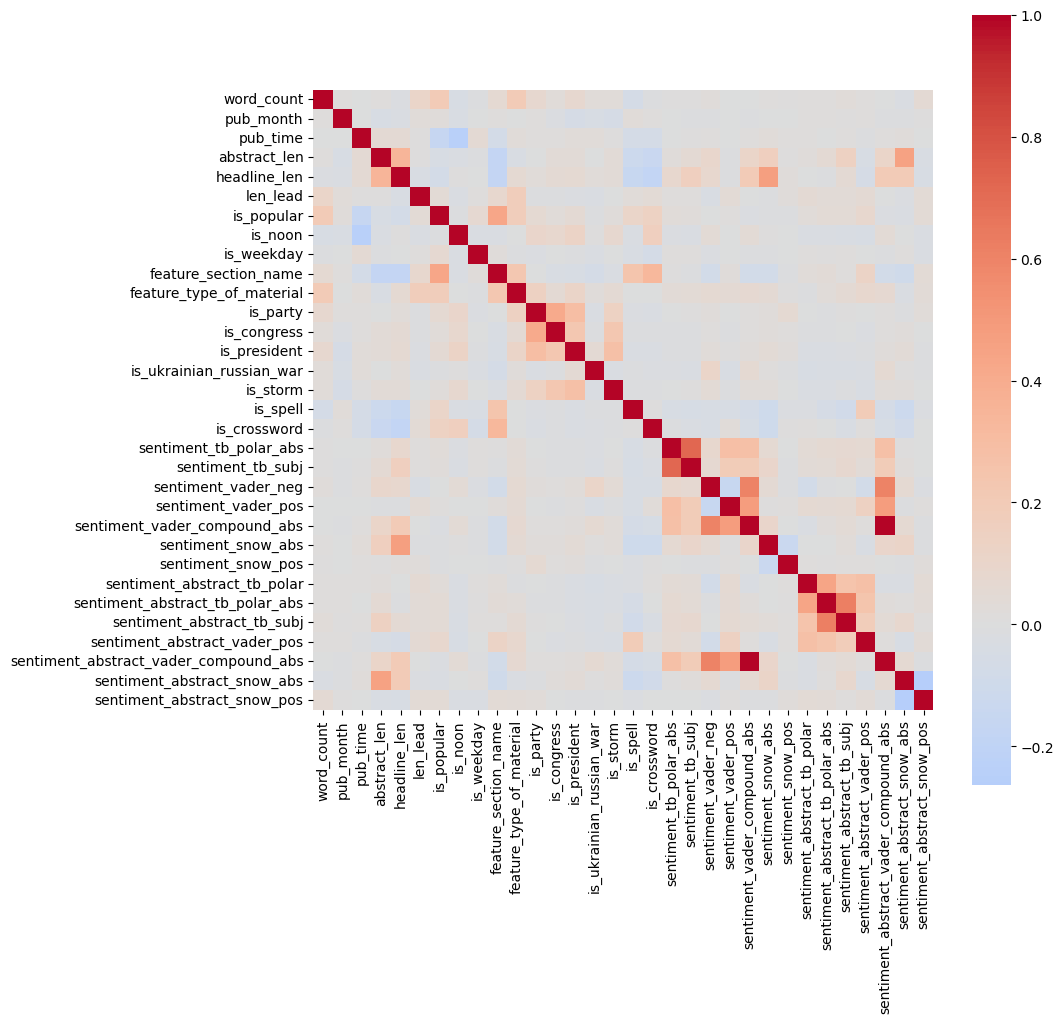

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

<AxesSubplot:>

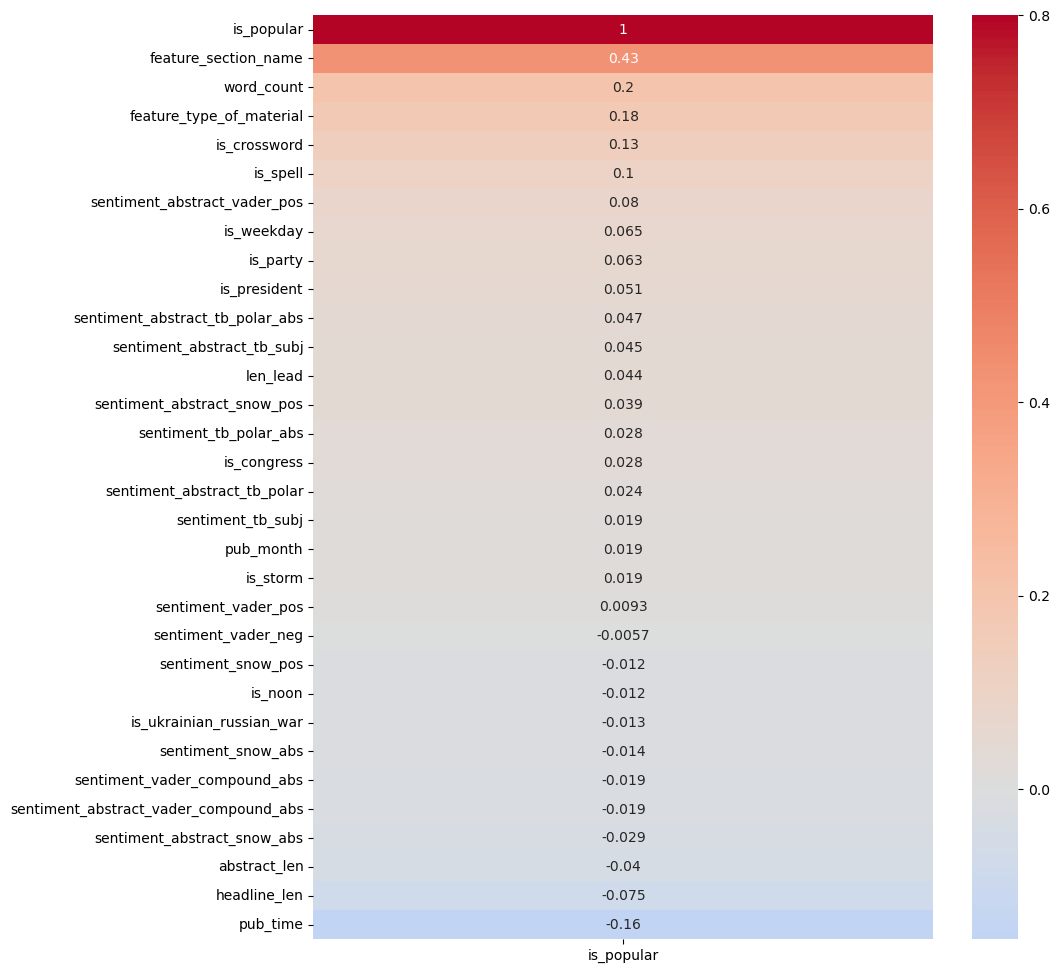

In [174]:
plt.figure(figsize=(10,12))
sns.heatmap(test.corr()[['is_popular']].sort_values(ascending=False, by='is_popular'), 
            cmap='coolwarm', annot=True, vmax=0.8, center=0)

# Check the features

In [175]:
if save:
    test.to_pickle(f'./feature/{feat_data}.pkl')
feat = pd.read_pickle(f'./feature/{feat_data}.pkl')
feat

,word_count,pub_month,pub_time,abstract_len,headline_len,len_lead,is_popular,is_noon,is_weekday,feature_section_name,...,sentiment_vader_compound_abs,sentiment_snow_abs,sentiment_snow_pos,sentiment_abstract_tb_polar,sentiment_abstract_tb_polar_abs,sentiment_abstract_tb_subj,sentiment_abstract_vader_pos,sentiment_abstract_vader_compound_abs,sentiment_abstract_snow_abs,sentiment_abstract_snow_pos
0,861,1,0,29,13,37,0,1,1,0.2,...,0.6597,0.520956,0,0.000000,0.000000,0.000000,0.000,0.6597,0.989987,0
1,670,1,3,18,2,74,1,1,1,1.0,...,0.4019,0.052466,0,0.456566,0.456566,0.640404,0.355,0.4019,0.227209,0
2,488,1,4,21,11,61,0,0,1,0.2,...,0.7184,0.841073,0,0.200000,0.200000,0.505556,0.000,0.7184,0.584198,0
3,1541,1,8,29,11,58,1,0,1,0.4,...,0.4019,0.481656,0,0.117677,0.117677,0.734848,0.000,0.4019,0.773454,0
4,0,1,10,8,13,8,0,0,1,0.8,...,0.0000,0.358287,0,0.000000,0.000000,0.000000,0.000,0.0000,0.207019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34352,1044,12,14,14,7,3,0,0,0,0.5,...,0.5994,0.698597,0,0.000000,0.000000,0.000000,0.000,0.5994,0.682118,0
34353,1089,12,16,13,13,35,0,0,0,0.5,...,0.0516,0.351888,0,0.318182,0.318182,0.477273,0.000,0.0516,0.207019,0
34354,1801,12,16,16,11,31,0,0,0,0.2,...,0.0000,0.440317,0,0.125000,0.125000,0.216667,0.000,0.0000,0.644997,0
34355,2426,12,17,31,7,34,0,0,0,0.8,...,0.4588,0.326809,1,0.366667,0.366667,0.633333,0.286,0.4588,0.989984,0


Index([ 'print_section', 'print_page', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'len_lead', 
       'is_popular'],
      dtype='object')